<a href="https://colab.research.google.com/github/Traversal2021/Machine-Learning-Assignments/blob/main/ML_assignmentv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install shap
# !pip install catboost

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostRegressor,Pool

plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/merged_data_v2.csv')

In [ ]:
list = ['gdp', 'hdi',
       'Number of maternal deaths', 'Unemployment', 'UrbanRatio', 'RuralRatio',
       'Population', 'MedianAge', 'FertilityRate','suicideRate']

for i in range(len(list)):
  df[list[i]] = MinMaxScaler().fit_transform(df[list[i]].values.reshape(-1,1))

print(df.head())


       Country Code  Year       gdp       hdi  Number of maternal deaths  \
0  Afghanistan  AFG  2002  0.004658  0.172611                   0.135922   
1  Afghanistan  AFG  2003  0.005042  0.186876                   0.135922   
2  Afghanistan  AFG  2004  0.004746  0.208274                   0.126214   
3  Afghanistan  AFG  2005  0.005467  0.222539                   0.126214   
4  Afghanistan  AFG  2006  0.005708  0.235378                   0.126214   

   Unemployment  UrbanRatio  RuralRatio  Population  MedianAge  FertilityRate  \
0      0.299569    0.152745    0.847255    0.014819   0.006079       0.942117   
1      0.296443    0.153748    0.846252    0.015986   0.006079       0.924485   
2      0.292320    0.155350    0.844650    0.016630   0.006079       0.902162   
3      0.298491    0.157563    0.842437    0.017238   0.012158       0.877979   
4      0.295311    0.159786    0.840214    0.017970   0.015198       0.850948   

   suicideRate  
0     0.145342  
1     0.143136  
2    

In [ ]:
features = df.columns
features=features.drop("suicideRate")

categorical_features = np.where((df[features].dtypes.all() != [float, int]))[0]


X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                    df[['suicideRate']], 
                                                    test_size=0.3, 
                                                     random_state=1)
 
params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':categorical_features,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 1
          }

cat_model = CatBoostRegressor(**params)
print(cat_model)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6989368	best: 0.6989368 (0)	total: 55.5ms	remaining: 4m 37s
200:	test: 0.7360082	best: 0.7360082 (200)	total: 1.17s	remaining: 27.9s
400:	test: 0.7395782	best: 0.7395782 (400)	total: 2.13s	remaining: 24.4s
600:	test: 0.7429891	best: 0.7429891 (600)	total: 3.43s	remaining: 25.1s
800:	test: 0.7451024	best: 0.7451024 (800)	total: 4.45s	remaining: 23.3s
1000:	test: 0.7462380	best: 0.7462380 (1000)	total: 5.61s	remaining: 22.4s
1200:	test: 0.7470713	best: 0.7470745 (1199)	total: 6.6s	remaining: 20.9s
1400:	test: 0.7478265	best: 0.7478280 (1399)	total: 7.54s	remaining: 19.4s
1600:	test: 0.7483801	best: 0.7483827 (1599)	total: 8.6s	remaining: 18.3s
1800:	test: 0.7489734	best: 0.7489734 (1800)	total: 9.55s	remaining: 17s
2000:	test: 0.7493846	best: 0.7493846 (2000)	total: 10.8s	remaining: 16.1s
2200:	test: 0.7498095	best: 0.7498095 (2200)	total: 11.8s	remaining: 15.1s
2400:	test: 0.7501796	best: 0.7501796 (2400)	total: 13s	remaining: 14.1s
2600:	test: 0.7505774	best: 0.7505774 (2600

In [ ]:
shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features) ,
                                               type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

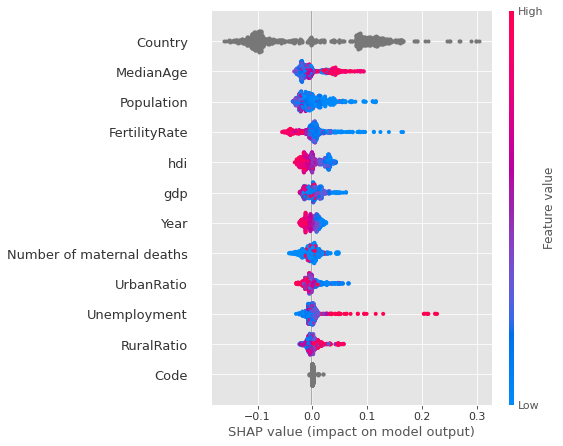

In [ ]:
shap.summary_plot(shap_values, X_test)


In [ ]:
suicide_data = pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/suicide-death-rates.csv?token=GHSAT0AAAAAABZCYAYERMUH64SGCO7LS2ISYZQGLDQ")
gdp_data = pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/gdp-per-capita-worldbank.csv?token=GHSAT0AAAAAABZCYAYEZLX5MJGIQIJIYHNWYZQGKAA")
hdi_data = pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/human-development-index.csv?token=GHSAT0AAAAAABZCYAYFFF3SL3ESDD3PBSXUYZQGKSA")
unemployment_data = pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/Unemployment.csv")
urban_data = pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/RuralUrban.csv")
population_data = pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/Population.csv")
median_age_data = pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/MedianAge.csv")
maternal_death_data = pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/MaternalDeaths.csv")
#gini_coeff_data = pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/GiniCoeff.csv")
fertility_data = pd.read_csv("https://raw.githubusercontent.com/Traversal2021/Machine-Learning-Assignments/main/Assignment1/data/FertilityRate.csv")

unemployment_data.rename(columns = {'Country':'Entity',}, inplace = True)
urban_data.rename(columns = {'Country':'Entity',}, inplace = True)
population_data.rename(columns = {'Country':'Entity',}, inplace = True)
median_age_data.rename(columns = {'Country':'Entity',}, inplace = True)
#gini_coeff_data.rename(columns = {'Country':'Entity',}, inplace = True)
fertility_data.rename(columns = {'Country':'Entity',}, inplace = True)

unemployment_data = unemployment_data.drop([ 'Unnamed: 0'], axis=1)
urban_data = urban_data.drop(['Unnamed: 0'], axis=1)
population_data = population_data.drop([ 'Unnamed: 0'], axis=1)
median_age_data = median_age_data.drop(['Unnamed: 0'], axis=1)
#gini_coeff_data = gini_coeff_data.drop(['Unnamed: 0'], axis=1)
fertility_data = fertility_data.drop(['Unnamed: 0'], axis=1)

dfs = [suicide_data, gdp_data, hdi_data, maternal_death_data, unemployment_data, urban_data, population_data, median_age_data, fertility_data]

result_df = dfs[0]
for i in range(1,9,1):
    result_df = result_df.merge(dfs[i], how='left', on=['Entity','Year'])

result_df.rename(columns = {
    'Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)':'suicideRate',
    'GDP per capita, PPP (constant 2017 international $)':'gdp',
    'Human Development Index (UNDP)':'hdi'
    }, inplace = True)

#

Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.


In [ ]:
suicide_data_df=result_df


suicide_data_df=suicide_data_df.dropna()
suicide_data_df=suicide_data_df.reset_index(drop=True)

In [ ]:
suicide_data_df=suicide_data_df.drop(['Code_x','Code_y'], axis = 1)

print(suicide_data_df.head())

        Entity  Year  suicideRate          gdp    hdi  \
0  Afghanistan  2002     8.466522  1189.784668  0.373   
1  Afghanistan  2003     8.368980  1235.810059  0.383   
2  Afghanistan  2004     8.324784  1200.277954  0.398   
3  Afghanistan  2005     8.122661  1286.793701  0.408   
4  Afghanistan  2006     7.952673  1315.789062  0.417   

   Number of maternal deaths  Unemployment  UrbanRatio  RuralRatio  \
0                    14000.0        11.257     0.22261     0.77739   
1                    14000.0        11.141     0.22353     0.77647   
2                    13000.0        10.988     0.22500     0.77500   
3                    13000.0        11.217     0.22703     0.77297   
4                    13000.0        11.099     0.22907     0.77093   

   Population  MedianAge Code  FertilityRate  
0  21000258.0       14.0  AFG         7.3394  
1  22645136.0       14.0  AFG         7.2199  
2  23553554.0       14.0  AFG         7.0686  
3  24411196.0       14.2  AFG         6.9047  
4

In [ ]:
suicide_data_df.rename(columns = {
    'Entity':'Country',
    }, inplace = True)

print(suicide_data_df.head())

       Country  Year  suicideRate          gdp    hdi  \
0  Afghanistan  2002     8.466522  1189.784668  0.373   
1  Afghanistan  2003     8.368980  1235.810059  0.383   
2  Afghanistan  2004     8.324784  1200.277954  0.398   
3  Afghanistan  2005     8.122661  1286.793701  0.408   
4  Afghanistan  2006     7.952673  1315.789062  0.417   

   Number of maternal deaths  Unemployment  UrbanRatio  RuralRatio  \
0                    14000.0        11.257     0.22261     0.77739   
1                    14000.0        11.141     0.22353     0.77647   
2                    13000.0        10.988     0.22500     0.77500   
3                    13000.0        11.217     0.22703     0.77297   
4                    13000.0        11.099     0.22907     0.77093   

   Population  MedianAge Code  FertilityRate  
0  21000258.0       14.0  AFG         7.3394  
1  22645136.0       14.0  AFG         7.2199  
2  23553554.0       14.0  AFG         7.0686  
3  24411196.0       14.2  AFG         6.9047  
4

In [ ]:
df = suicide_data_df[["Country", "Code", "Year",'gdp', 'hdi',
       'Number of maternal deaths', 'Unemployment', 'UrbanRatio', 'RuralRatio',
       'Population', 'MedianAge', 'FertilityRate','suicideRate']]
print(MinMaxScaler().fit_transform(df[['gdp', 'hdi',
       'Number of maternal deaths', 'Unemployment', 'UrbanRatio', 'RuralRatio',
       'Population', 'MedianAge', 'FertilityRate','suicideRate']].values.reshape(-1,1)))



[[8.43653792e-07]
 [2.64487241e-10]
 [9.92713506e-06]
 ...
 [1.22671021e-08]
 [2.62813804e-09]
 [1.72239165e-08]]


In [ ]:
features = df.columns
features=features.drop("suicideRate")

categorical_features = np.where((df[features].dtypes.all() != [float, int]))[0]


X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                    df[['suicideRate']], 
                                                    test_size=0.3, 
                                                     random_state=1)
 
params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':categorical_features,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 1
          }

cat_model = CatBoostRegressor(**params)
print(cat_model)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );
# from catboost import CatBoostClassifier, Pool
# shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features) ,
#                                                type="ShapValues")
 
# expected_value = shap_values[0,-1]
# shap_values = shap_values[:,:-1]

# shap.initjs()
# shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])




MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoostError: ignored

In [ ]:
print(df[['suicideRate']])

In [ ]:
# time series plot for USA, Norway, Turkey and China

plt.figure(figsize=(32,16))

plt.subplot(2,2,1)
plt.plot(suicide_data_df['gdp'], suicide_data_df['hdi'],linestyle='none', marker='o')
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Human Development Index (UNDP)')
plt.grid()
plt.legend()

plt.subplot(2,2,2)
plt.plot(suicide_data_df['gdp'], suicide_data_df['suicideRate'],linestyle='none', marker='o')
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('suicide rate')
plt.grid()
plt.legend()

plt.subplot(2,2,3)
plt.plot(suicide_data_df['hdi'], suicide_data_df['suicideRate'],linestyle='none', marker='o')
plt.xlabel('Human Development Index (UNDP)')
plt.ylabel('suicide rate')
plt.grid()
plt.legend()

plt.show()